In [4]:
# imported libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# local imports
import wrangle as w
import summarize as s

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Exploration Working Notebook

# Generate dataframes and split data for exploration

In [42]:
train, val, test, train_scaled, val_scaled, test_scaled, new_df, df_customers, df = w.wrangle_data()

In [6]:
# checking for subset shape
train.shape, val.shape, test.shape

((234509, 19), (50252, 19), (50253, 19))

# Cleaned & Prepped DataFrame

In [7]:
# cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335014 entries, 0 to 541908
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            335014 non-null  object        
 1   stock_code            335014 non-null  object        
 2   description           335014 non-null  object        
 3   quantity              335014 non-null  int64         
 4   invoice_date          335014 non-null  datetime64[ns]
 5   unit_price            335014 non-null  float64       
 6   customer_id           335014 non-null  object        
 7   country               335014 non-null  object        
 8   total_price           335014 non-null  float64       
 9   invoice_date_day      335014 non-null  object        
 10  invoice_date_time     335014 non-null  object        
 11  invoice_year          335014 non-null  int32         
 12  invoice_month         335014 non-null  int32         
 13  invo

In [8]:
# Checking for nulls
df.isnull().sum()

invoice_no              0
stock_code              0
description             0
quantity                0
invoice_date            0
unit_price              0
customer_id             0
country                 0
total_price             0
invoice_date_day        0
invoice_date_time       0
invoice_year            0
invoice_month           0
invoice_month_name      0
invoice_day             0
invoice_day_name        0
invoice_day_of_week     0
invoice_week_of_year    0
invoice_hour            0
dtype: int64

In [9]:
df.head(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,invoice_date_day,invoice_date_time,invoice_year,invoice_month,invoice_month_name,invoice_day,invoice_day_name,invoice_day_of_week,invoice_week_of_year,invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12-01,08:26:00,2010,12,December,1,Wednesday,2,48,8


# Aggregated and groupedby dataframe


In [10]:
new_df

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 12347 to 18287
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_date  4188 non-null   int64  
 1   invoice_no    4188 non-null   int64  
 2   total_price   4188 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 130.9+ KB


In [11]:
s.summarize(train)

Shape of Data: 
(234509, 19)
Info: 
<class 'pandas.core.frame.DataFrame'>
Index: 234509 entries, 298159 to 212465
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            234509 non-null  object        
 1   stock_code            234509 non-null  object        
 2   description           234509 non-null  object        
 3   quantity              234509 non-null  int64         
 4   invoice_date          234509 non-null  datetime64[ns]
 5   unit_price            234509 non-null  float64       
 6   customer_id           234509 non-null  object        
 7   country               234509 non-null  object        
 8   total_price           234509 non-null  float64       
 9   invoice_date_day      234509 non-null  object        
 10  invoice_date_time     234509 non-null  object        
 11  invoice_year          234509 non-null  int32         
 12  invoice_month         

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234509 entries, 298159 to 212465
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            234509 non-null  object        
 1   stock_code            234509 non-null  object        
 2   description           234509 non-null  object        
 3   quantity              234509 non-null  int64         
 4   invoice_date          234509 non-null  datetime64[ns]
 5   unit_price            234509 non-null  float64       
 6   customer_id           234509 non-null  object        
 7   country               234509 non-null  object        
 8   total_price           234509 non-null  float64       
 9   invoice_date_day      234509 non-null  object        
 10  invoice_date_time     234509 non-null  object        
 11  invoice_year          234509 non-null  int32         
 12  invoice_month         234509 non-null  int32         
 13 

In [13]:
train.invoice_month_name.value_counts()

invoice_month_name
November     39333
October      29705
December     25959
September    23732
May          16159
March        15776
August       15714
June         15701
July         15569
April        13199
January      12188
February     11474
Name: count, dtype: int64

In [14]:
month_counts = train.invoice_month_name.value_counts()

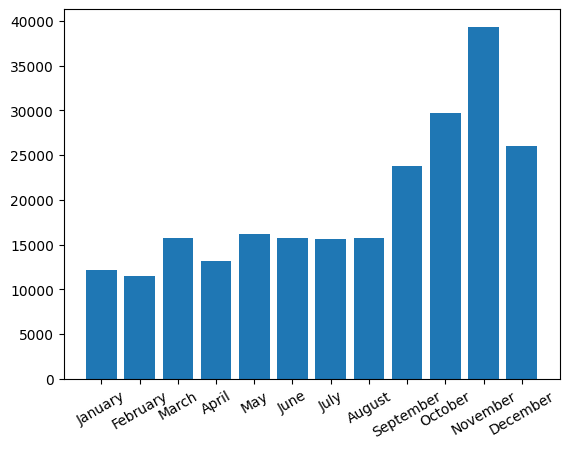

In [15]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Sort the month counts according to the specified order
sorted_month_counts = month_counts.reindex(month_order)

# Plot the bar chart
plt.bar(x=sorted_month_counts.index, height=sorted_month_counts.values)
plt.xticks(rotation=30)
plt.show()


In [14]:
train.invoice_day_name.value_counts()

invoice_day_name
Thursday     55167
Wednesday    47483
Tuesday      45797
Monday       44788
Sunday       43665
Friday       37728
Name: count, dtype: int64

In [15]:
train.invoice_month_name

485895     November
198074          May
72244       January
67742       January
39005      December
            ...    
366979    September
503414     November
194646          May
214268         June
180666          May
Name: invoice_month_name, Length: 274628, dtype: object

In [17]:
train.head(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,quantity_outliers,unit_price_outliers,...,invoice_date_day,invoice_date_time,invoice_year,invoice_month,invoice_month_name,invoice_day,invoice_day_name,invoice_day_of_week,invoice_week_of_year,invoice_hour
485895,577694,23534,WALL ART STOP FOR TEA,2,2011-11-21 11:50:00,5.95,14702,United Kingdom,0,0,...,2011-11-21,11:50:00,2011,11,November,21,Monday,0,47,11
198074,554009,20725,LUNCH BAG RED RETROSPOT,10,2011-05-20 12:38:00,1.65,12935,United Kingdom,0,0,...,2011-05-20,12:38:00,2011,5,May,20,Friday,4,20,12
72244,542236,21927,BLUE/CREAM STRIPE CUSHION COVER,4,2011-01-26 14:19:00,1.25,17027,United Kingdom,0,0,...,2011-01-26,14:19:00,2011,1,January,26,Wednesday,2,4,14


In [18]:
train.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,274628.0,12.419003,1.0,2.0,6.0,12.0,4800.0,40.375904
invoice_date,274628,2011-07-11 04:21:49.282156288,2010-12-01 08:26:00,2011-04-07 11:37:00,2011-07-31 15:31:00,2011-10-20 16:21:00,2011-12-09 12:50:00,NaN
unit_price,274628.0,2.98103,0.001,1.25,1.85,3.75,4161.06,14.409863
quantity_outliers,274628.0,0.063693,0.0,0.0,0.0,0.0,1.0,0.244206
unit_price_outliers,274628.0,0.08411,0.0,0.0,0.0,0.0,1.0,0.277553
total_price,274628.0,21.156151,0.001,4.68,11.8,19.8,7144.72,66.541507
invoice_year,274628.0,2010.934013,2010.0,2011.0,2011.0,2011.0,2011.0,0.248261
invoice_month,274628.0,7.621954,1.0,5.0,8.0,11.0,12.0,3.417359
invoice_day,274628.0,15.037389,1.0,7.0,15.0,22.0,31.0,8.654164
invoice_day_of_week,274628.0,2.618691,0.0,1.0,2.0,4.0,6.0,1.931497


In [19]:
train[['quantity', 'unit_price', 'total_price']].head()

,quantity,unit_price,total_price
485895,2,5.95,11.90
198074,10,1.65,16.50
72244,4,1.25,5.00
67742,3,1.25,3.75
39005,1,1.45,1.45


In [20]:
train_scaled.shape, val_scaled.shape, test_scaled.shape

((274628, 21), (58849, 21), (58849, 21))

In [21]:
train_scaled.head(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,quantity_outliers,unit_price_outliers,...,invoice_date_day,invoice_date_time,invoice_year,invoice_month,invoice_month_name,invoice_day,invoice_day_name,invoice_day_of_week,invoice_week_of_year,invoice_hour
485895,577694,23534,WALL ART STOP FOR TEA,0.000208,2011-11-21 11:50:00,0.001430,14702,United Kingdom,0.0,0.0,...,2011-11-21,11:50:00,1.0,0.909091,November,0.666667,Monday,0.000000,0.92,0.307692
198074,554009,20725,LUNCH BAG RED RETROSPOT,0.001875,2011-05-20 12:38:00,0.000396,12935,United Kingdom,0.0,0.0,...,2011-05-20,12:38:00,1.0,0.363636,May,0.633333,Friday,0.666667,0.38,0.384615
72244,542236,21927,BLUE/CREAM STRIPE CUSHION COVER,0.000625,2011-01-26 14:19:00,0.000300,17027,United Kingdom,0.0,0.0,...,2011-01-26,14:19:00,1.0,0.000000,January,0.833333,Wednesday,0.333333,0.06,0.538462


In [22]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274628 entries, 485895 to 180666
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            274628 non-null  object        
 1   stock_code            274628 non-null  object        
 2   description           274628 non-null  object        
 3   quantity              274628 non-null  float64       
 4   invoice_date          274628 non-null  datetime64[ns]
 5   unit_price            274628 non-null  float64       
 6   customer_id           274628 non-null  object        
 7   country               274628 non-null  object        
 8   quantity_outliers     274628 non-null  float64       
 9   unit_price_outliers   274628 non-null  float64       
 10  total_price           274628 non-null  float64       
 11  invoice_date_day      274628 non-null  object        
 12  invoice_date_time     274628 non-null  object        
 13 

In [23]:
train_scaled.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,274628.0,0.002379,0.0,0.000208,0.001042,0.002292,1.0,0.008413
invoice_date,274628,2011-07-11 04:21:49.282156288,2010-12-01 08:26:00,2011-04-07 11:37:00,2011-07-31 15:31:00,2011-10-20 16:21:00,2011-12-09 12:50:00,NaN
unit_price,274628.0,0.000716,0.0,0.0003,0.000444,0.000901,1.0,0.003463
quantity_outliers,274628.0,0.063693,0.0,0.0,0.0,0.0,1.0,0.244206
unit_price_outliers,274628.0,0.08411,0.0,0.0,0.0,0.0,1.0,0.277553
total_price,274628.0,0.002961,0.0,0.000655,0.001651,0.002771,1.0,0.009313
invoice_year,274628.0,0.934013,0.0,1.0,1.0,1.0,1.0,0.248261
invoice_month,274628.0,0.601996,0.0,0.363636,0.636364,0.909091,1.0,0.310669
invoice_day,274628.0,0.467913,0.0,0.2,0.466667,0.7,1.0,0.288472
invoice_day_of_week,274628.0,0.436449,0.0,0.166667,0.333333,0.666667,1.0,0.321916


In [25]:
train_scaled.columns.to_list()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'quantity_outliers',
 'unit_price_outliers',
 'total_price',
 'invoice_date_day',
 'invoice_date_time',
 'invoice_year',
 'invoice_month',
 'invoice_month_name',
 'invoice_day',
 'invoice_day_name',
 'invoice_day_of_week',
 'invoice_week_of_year',
 'invoice_hour']

In [26]:
train_scaled.head(3)  

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,quantity_outliers,unit_price_outliers,...,invoice_date_day,invoice_date_time,invoice_year,invoice_month,invoice_month_name,invoice_day,invoice_day_name,invoice_day_of_week,invoice_week_of_year,invoice_hour
485895,577694,23534,WALL ART STOP FOR TEA,0.000208,2011-11-21 11:50:00,0.001430,14702,United Kingdom,0.0,0.0,...,2011-11-21,11:50:00,1.0,0.909091,November,0.666667,Monday,0.000000,0.92,0.307692
198074,554009,20725,LUNCH BAG RED RETROSPOT,0.001875,2011-05-20 12:38:00,0.000396,12935,United Kingdom,0.0,0.0,...,2011-05-20,12:38:00,1.0,0.363636,May,0.633333,Friday,0.666667,0.38,0.384615
72244,542236,21927,BLUE/CREAM STRIPE CUSHION COVER,0.000625,2011-01-26 14:19:00,0.000300,17027,United Kingdom,0.0,0.0,...,2011-01-26,14:19:00,1.0,0.000000,January,0.833333,Wednesday,0.333333,0.06,0.538462


## New features below based on features present:

In [16]:
train.total_price.value_counts()

total_price
15.00     13852
17.70      6401
10.20      5603
19.80      5302
1.25       5251
          ...  
102.80        1
20.94         1
17.76         1
57.60         1
11.97         1
Name: count, Length: 1068, dtype: int64

In [17]:
train.total_price.head()

298159    11.80
312774    15.00
466189     1.45
213460    25.00
314832    16.50
Name: total_price, dtype: float64

## Can we see patterns, find signals in the data?

## What features are driving the outcome?

## Are there other features we can construct that have stronger relationships?

## Visualization and statistical testing

## I want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, etc.).

## Lets take a look at the distributions of all features in the data

## What is the distribution of scaled numerical features?

Cannot create histogram. The data type of invoice_no is not numeric.
Cannot create histogram. The data type of stock_code is not numeric.
Cannot create histogram. The data type of description is not numeric.


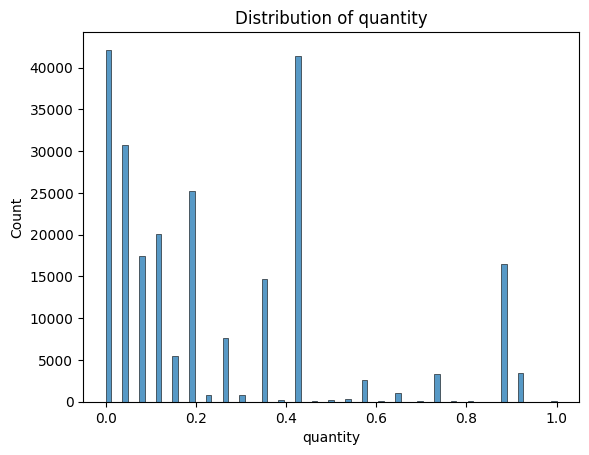

Cannot create histogram. The data type of invoice_date is not numeric.


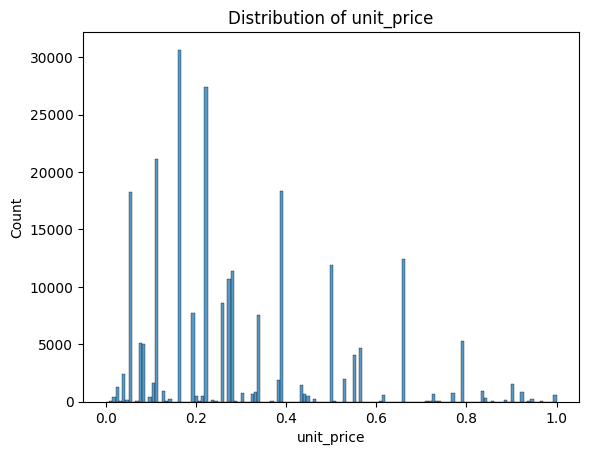

Cannot create histogram. The data type of customer_id is not numeric.
Cannot create histogram. The data type of country is not numeric.


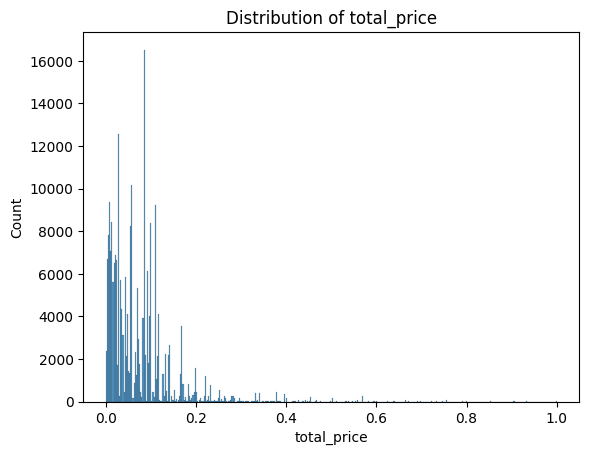

Cannot create histogram. The data type of invoice_date_day is not numeric.
Cannot create histogram. The data type of invoice_date_time is not numeric.


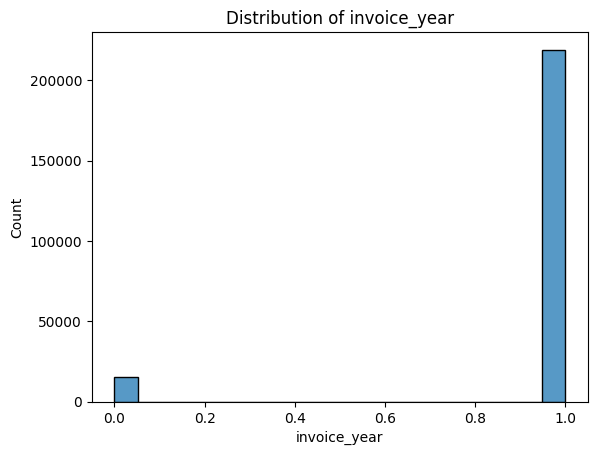

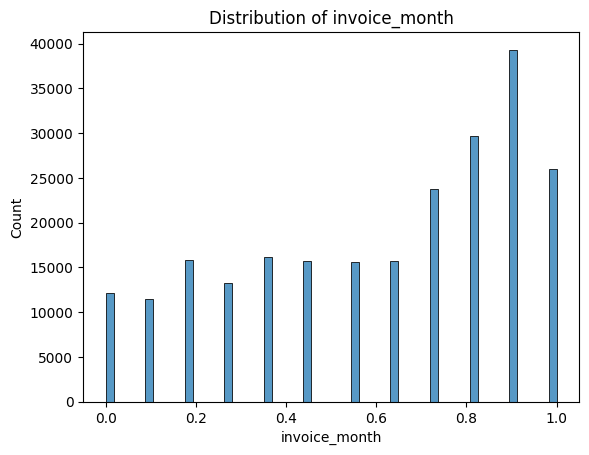

Cannot create histogram. The data type of invoice_month_name is not numeric.


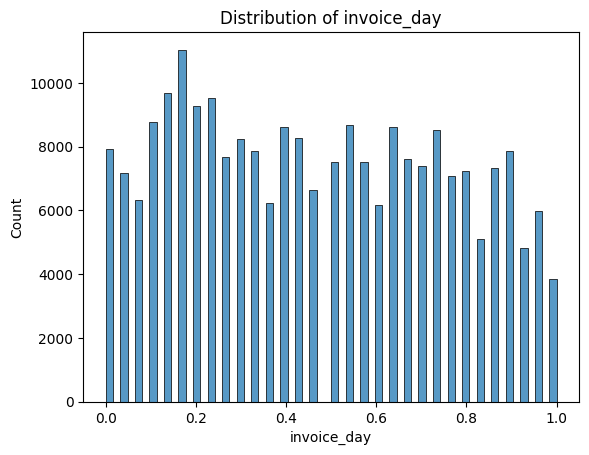

Cannot create histogram. The data type of invoice_day_name is not numeric.


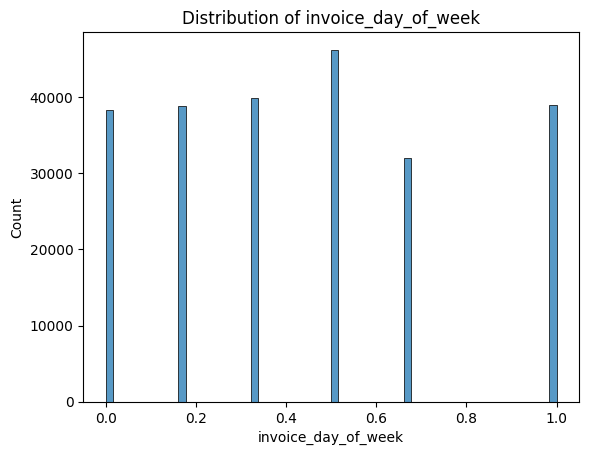

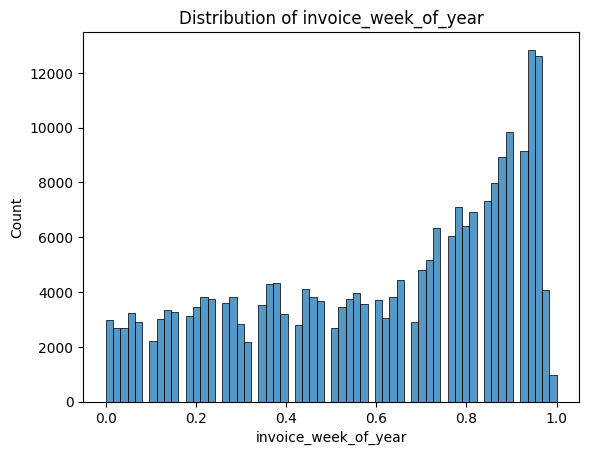

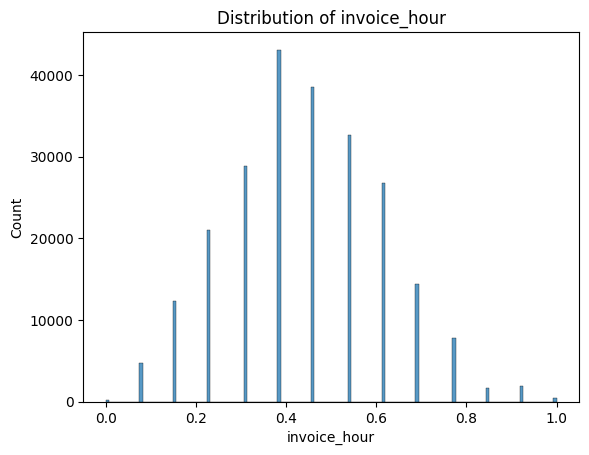

In [18]:
col = train_scaled.columns.tolist()

# Loop through each column in the list
for col_name in col:
    # Check the data type of the current column
    if train_scaled[col_name].dtype.kind in 'biufc':
        # Create histogram if the data type is numeric
        plt.figure()
        plt.title(f'Distribution of {col_name}')
        sns.histplot(data=train_scaled, x=col_name)
        plt.show()
    else:
        print(f"Cannot create histogram. The data type of {col_name} is not numeric.")

## Categorical data

## What is the distribution of categorical features?

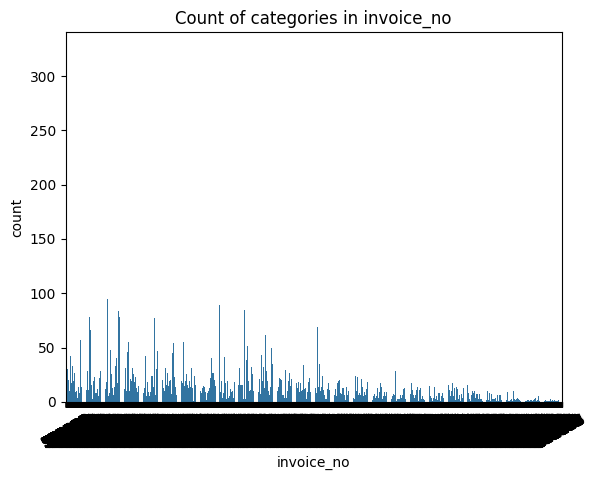

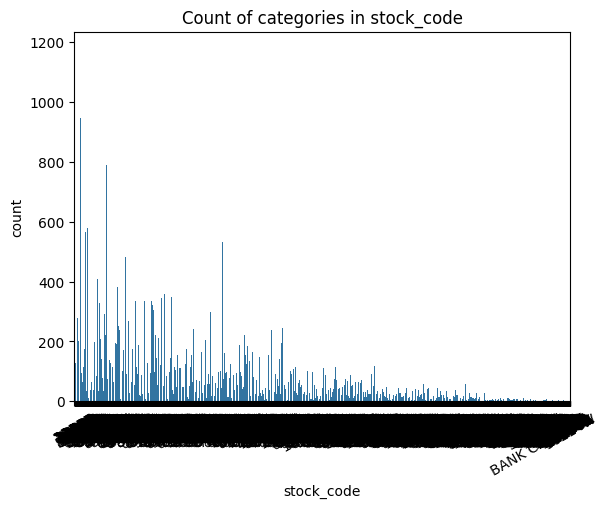

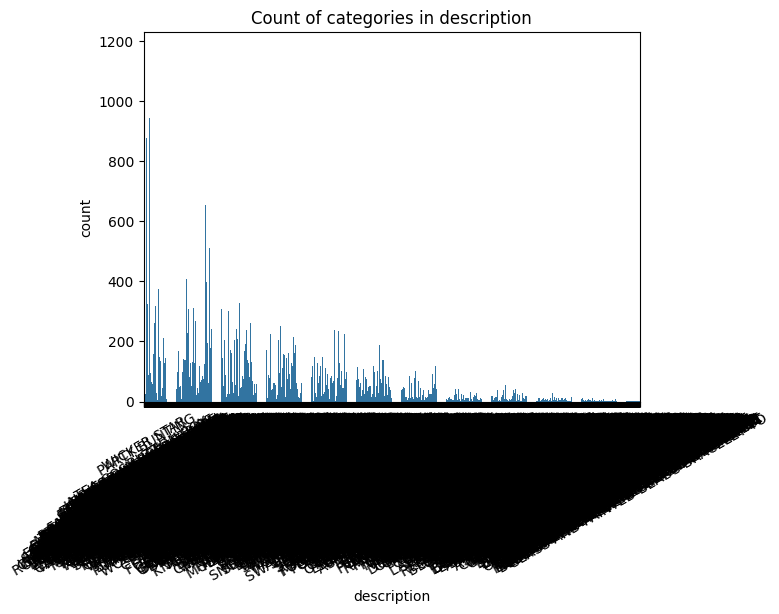

Cannot create countplot. The data type of quantity is numeric.


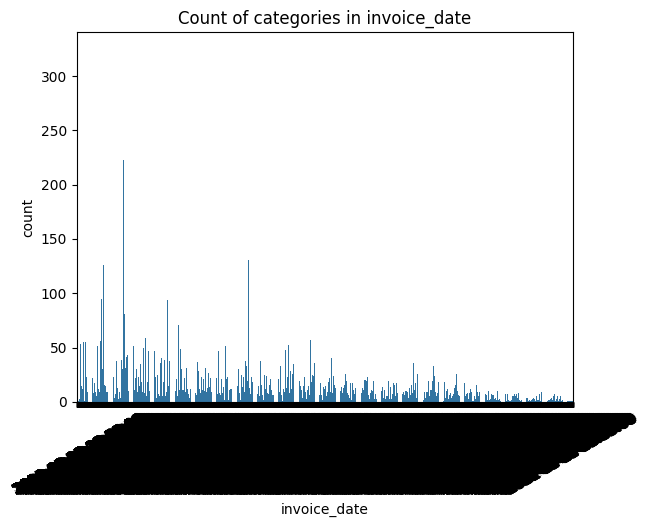

Cannot create countplot. The data type of unit_price is numeric.


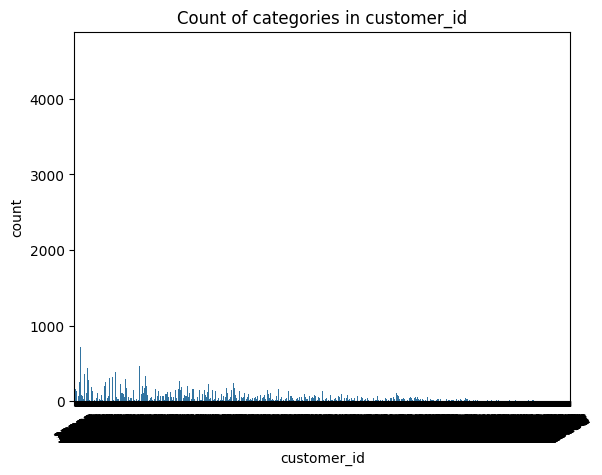

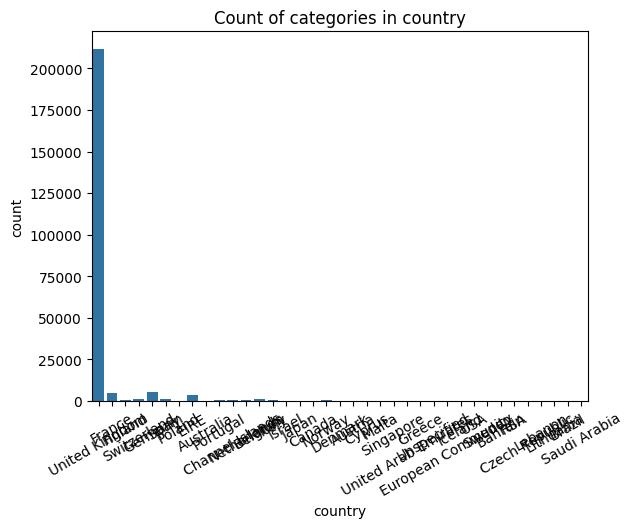

Cannot create countplot. The data type of total_price is numeric.


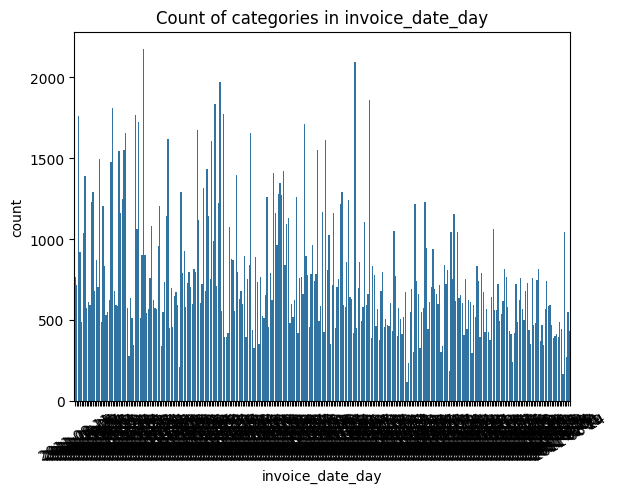

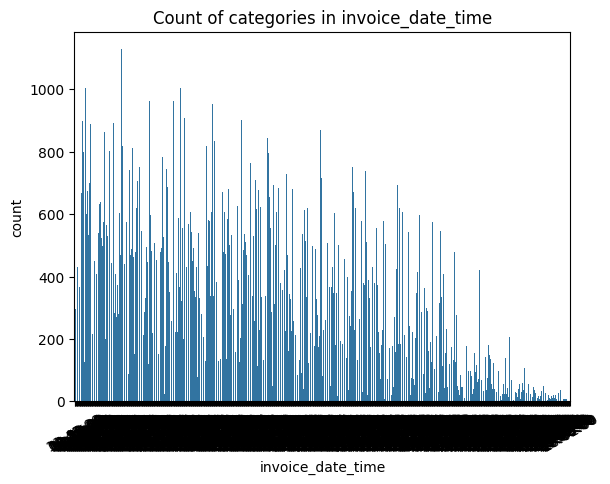

Cannot create countplot. The data type of invoice_year is numeric.
Cannot create countplot. The data type of invoice_month is numeric.


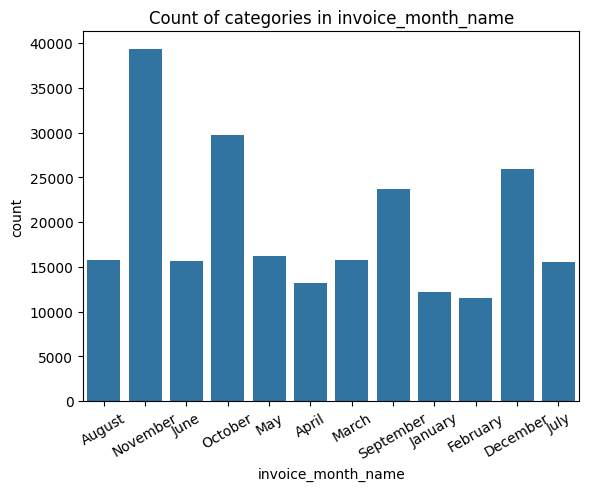

Cannot create countplot. The data type of invoice_day is numeric.


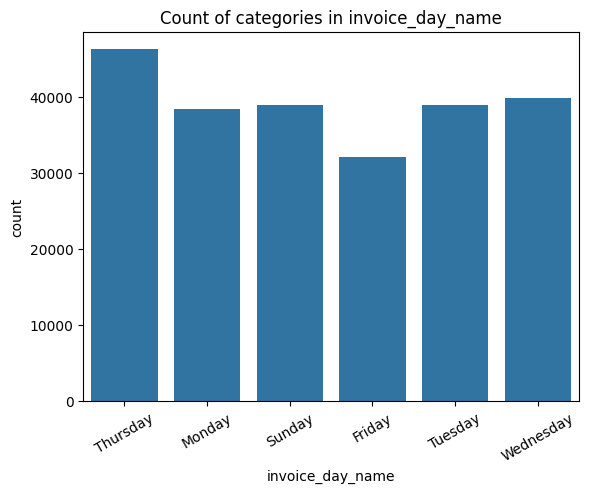

Cannot create countplot. The data type of invoice_day_of_week is numeric.
Cannot create countplot. The data type of invoice_week_of_year is numeric.
Cannot create countplot. The data type of invoice_hour is numeric.


In [19]:
# Loop through each column in the list
for col_name in col:
    # Check if the current column is categorical (non-numeric)
    if train_scaled[col_name].dtype.kind not in 'biufc':
        # Create countplot if the data type is non-numeric (categorical)
        plt.figure()
        plt.title(f'Count of categories in {col_name}')
        sns.countplot(data=train_scaled, x=col_name)
        plt.xticks(rotation=30)  # Rotate x-axis labels for better readability if needed
        plt.show()
    else:
        print(f"Cannot create countplot. The data type of {col_name} is numeric.")

# What is the correlation between all numerical features?

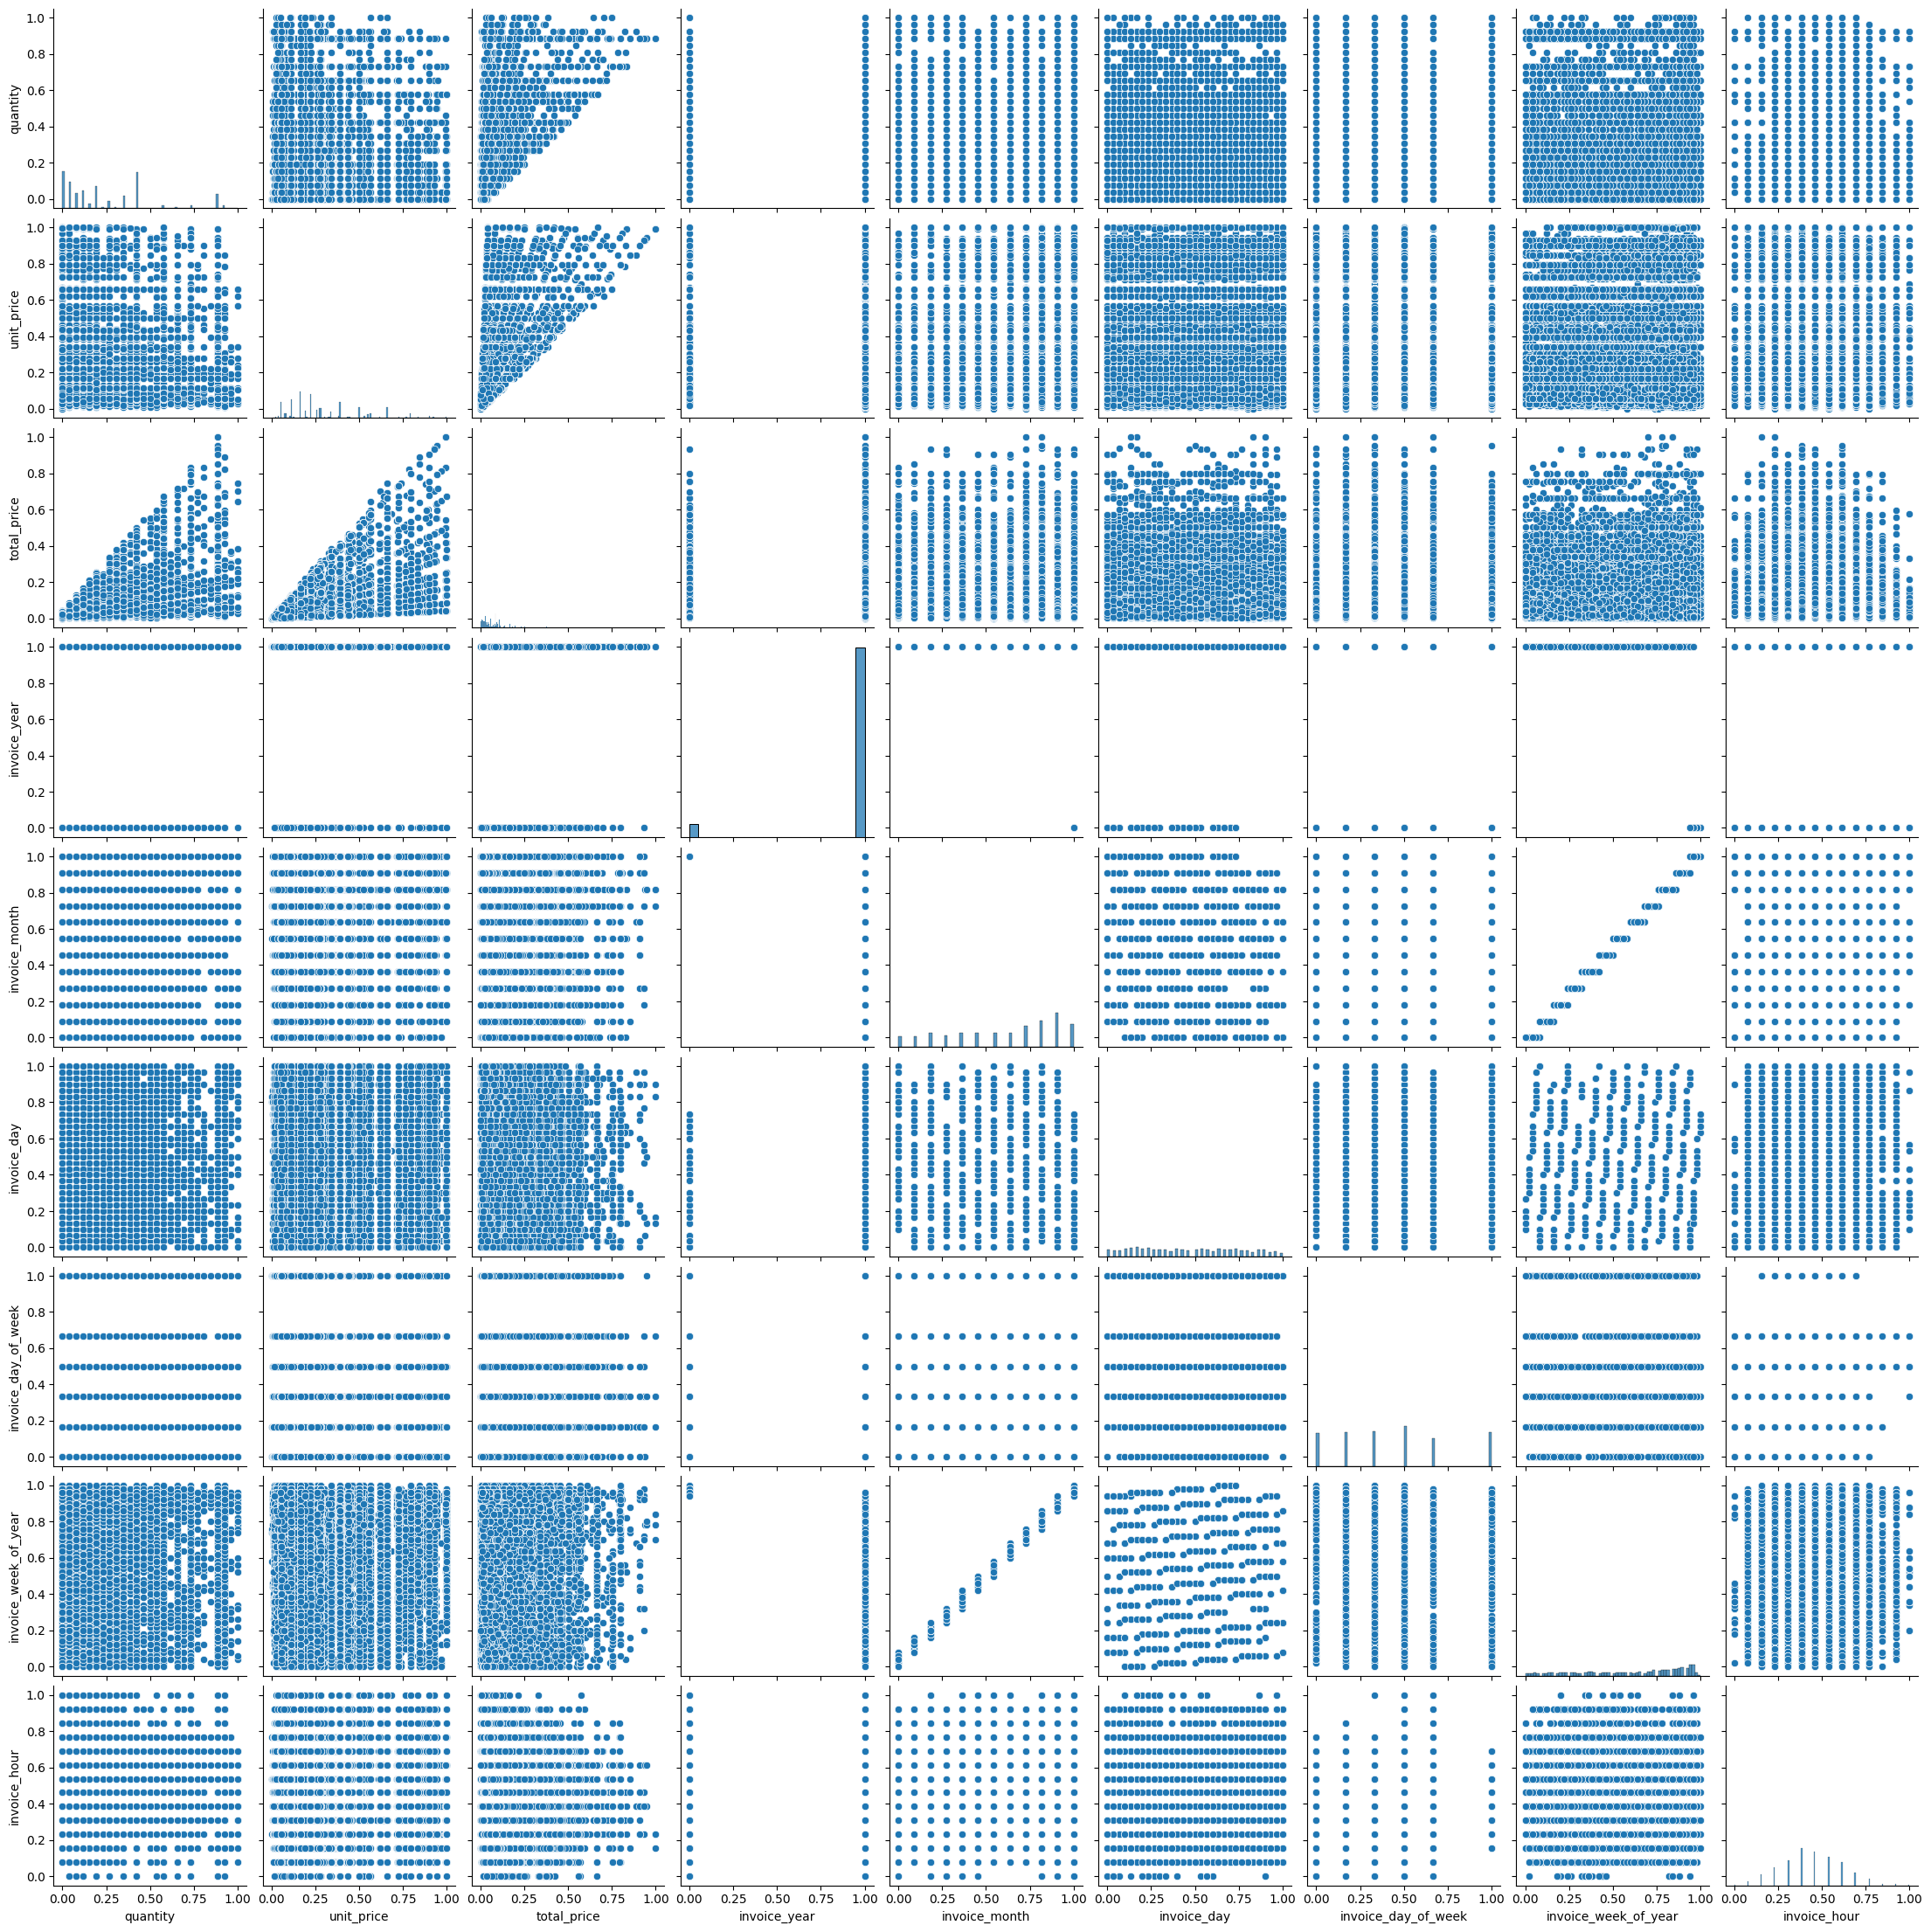

In [20]:
sns.pairplot(data = train_scaled, corner=False)

# what is the `country` count distributions within this data?

In [21]:
country_cnts = train_scaled.country.value_counts()
country_cnts = pd.DataFrame(country_cnts).reset_index()
country_cnts = country_cnts[country_cnts['count'] > 1000]

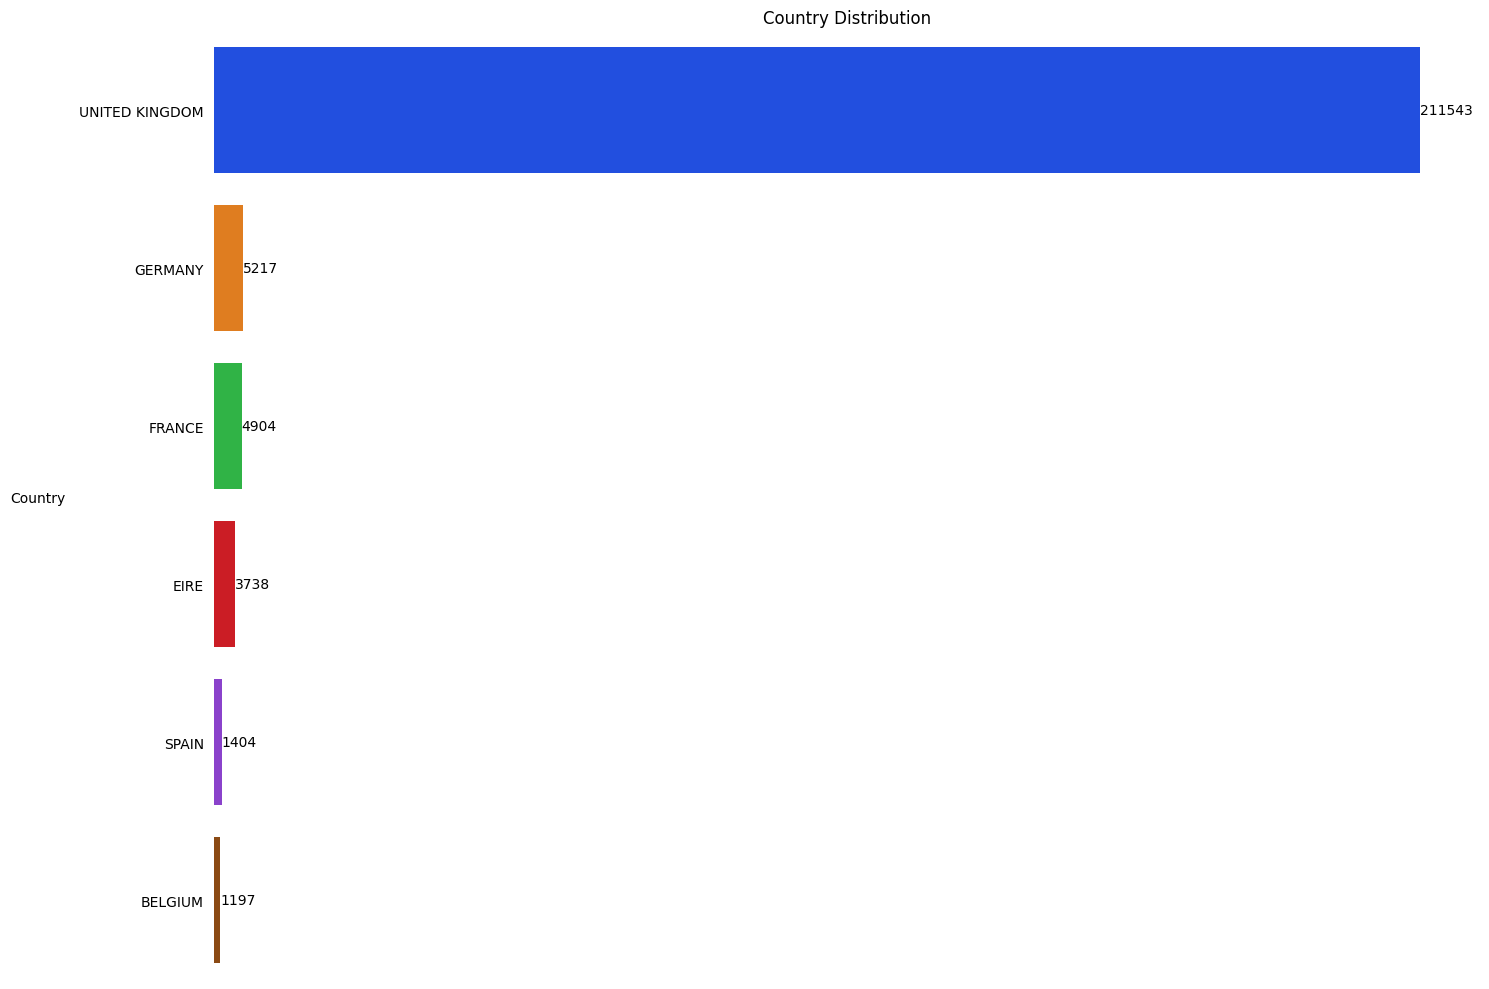

In [22]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()

* The data is comprised of alot of infmormation relating to the United Kingdom

In [23]:
train_scaled.columns.to_list()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'total_price',
 'invoice_date_day',
 'invoice_date_time',
 'invoice_year',
 'invoice_month',
 'invoice_month_name',
 'invoice_day',
 'invoice_day_name',
 'invoice_day_of_week',
 'invoice_week_of_year',
 'invoice_hour']

## How does `quantity` vary with `customer_id` by country?

<Figure size 1000x600 with 0 Axes>

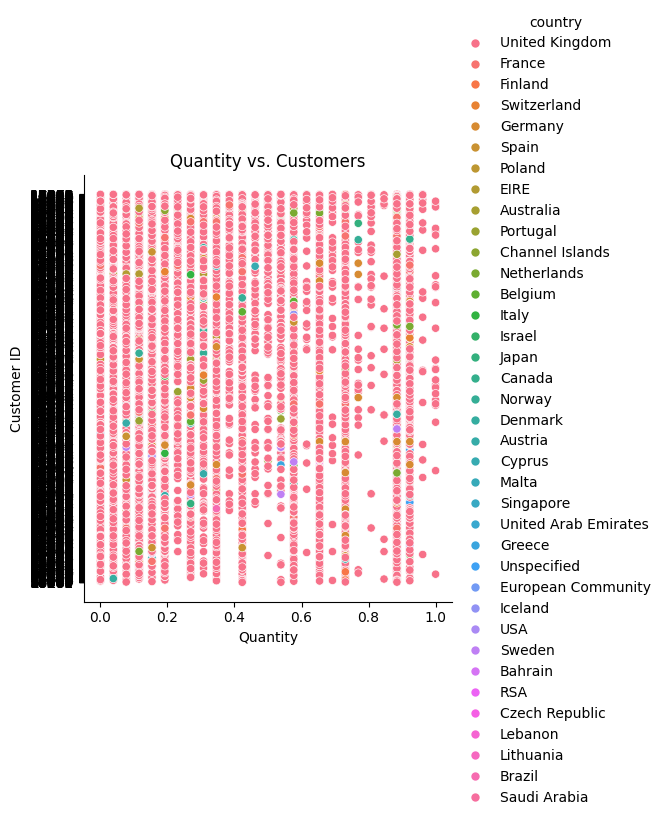

In [24]:
plt.figure(figsize=(10, 6))
sns.relplot(x='quantity', y='customer_id', hue='country', data=train_scaled)
plt.title('Quantity vs. Customers')
plt.xlabel('Quantity')
plt.ylabel('Customer ID')
plt.show()

## how about `unit_price` and `customer_id`?

<Figure size 1000x600 with 0 Axes>

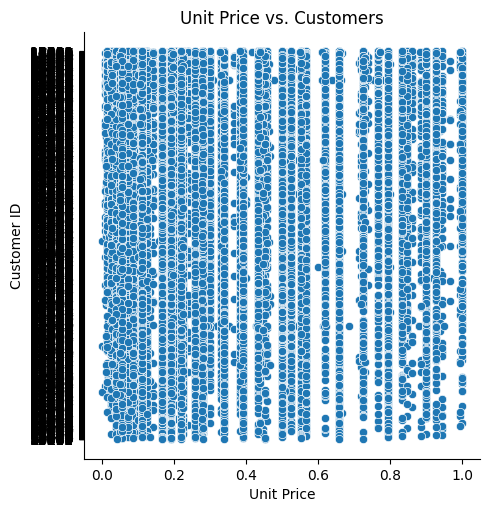

In [25]:
plt.figure(figsize=(10, 6))
sns.relplot(x='unit_price', y='customer_id', data=train_scaled)
plt.title('Unit Price vs. Customers')
plt.xlabel('Unit Price')
plt.ylabel('Customer ID')
plt.show()

## Scatter plot of  `total_price` and `quantity`

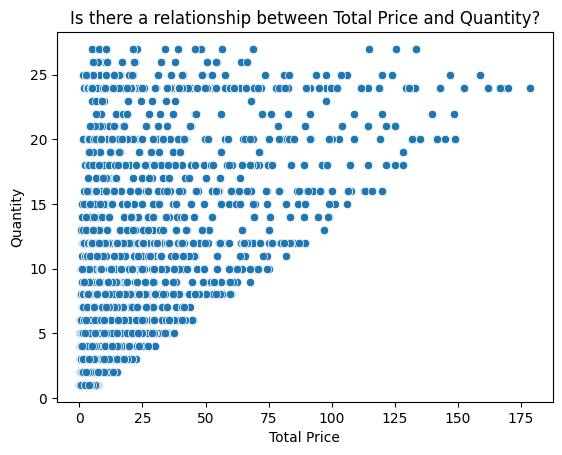

In [26]:
# plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_price', y='quantity', data=train)
plt.title('Is there a relationship between Total Price and Quantity?')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.show()

# -----------------------------------------------------------------

# How would scaling and normalizing features aid in getting a better visualization of distribution that exist within this dataset?

A data split and then scaling the train subset aided in providing a better visual and distribution of the data.

# Code added to prep function to handle negative values:

In [27]:
# df['quantity'] = df['quantity'].apply(lambda x: max(x, 0))
    
# df['unit_price'] = df['unit_price'].apply(lambda x: max(x, 0))

# -----------------------------------------------------------------

## I'm going to bin quantities:

In [47]:
train['quantity_bin'] = pd.cut(train.quantity, [0, 10, 20, 30])

train.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,invoice_date_day,...,invoice_month_name,invoice_day,invoice_day_name,invoice_day_of_week,invoice_week_of_year,invoice_hour,quantity_bin,Recency,Frequency,MonetaryValue
298159,562984,22137,BATHROOM SET LOVE HEART DESIGN,4,2011-08-11 11:45:00,2.95,17841,United Kingdom,11.80,2011-08-11,...,August,11,Thursday,3,32,11,"(0, 10]",2011-12-08 12:07:00,4655,21497.01
312774,564372,23352,ROLL WRAP 50'S RED CHRISTMAS,12,2011-08-25 09:55:00,1.25,12714,France,15.00,2011-08-25,...,August,25,Thursday,3,34,9,"(10, 20]",2011-11-30 15:43:00,147,2319.18
466189,576321,22597,MUSICAL ZINC HEART DECORATION,5,2011-11-14 14:59:00,0.29,14953,United Kingdom,1.45,2011-11-14,...,November,14,Monday,0,46,14,"(0, 10]",2011-11-14 14:59:00,39,147.76
213460,555541,23069,EDWARDIAN PHOTO FRAME,4,2011-06-05 12:51:00,6.25,16883,United Kingdom,25.00,2011-06-05,...,June,5,Sunday,6,22,12,"(0, 10]",2011-06-05 12:51:00,21,147.83
314832,564660,22383,LUNCH BAG SUKI DESIGN,10,2011-08-26 14:45:00,1.65,15074,United Kingdom,16.50,2011-08-26,...,August,26,Friday,4,34,14,"(0, 10]",2011-08-26 14:45:00,30,516.19


## How does quantity vary from total_price?

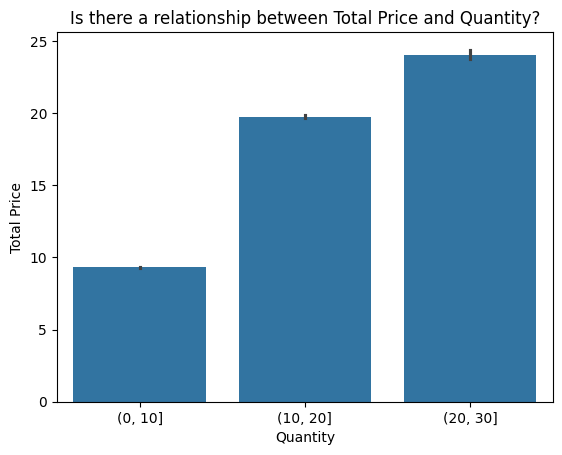

In [48]:
sns.barplot(x='quantity_bin', y='total_price', data=train)
plt.title('Is there a relationship between Total Price and Quantity?')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234509 entries, 298159 to 212465
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   invoice_no            234509 non-null  object  
 1   stock_code            234509 non-null  object  
 2   description           234509 non-null  object  
 3   quantity              234509 non-null  int64   
 4   unit_price            234509 non-null  float64 
 5   customer_id           234509 non-null  object  
 6   country               234509 non-null  object  
 7   total_price           234509 non-null  float64 
 8   invoice_date_day      234509 non-null  object  
 9   invoice_date_time     234509 non-null  object  
 10  invoice_year          234509 non-null  int32   
 11  invoice_month         234509 non-null  int32   
 12  invoice_month_name    234509 non-null  object  
 13  invoice_day           234509 non-null  int32   
 14  invoice_day_name      234509 non-nul

In [38]:
train.columns.tolist()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'unit_price',
 'customer_id',
 'country',
 'total_price',
 'invoice_date_day',
 'invoice_date_time',
 'invoice_year',
 'invoice_month',
 'invoice_month_name',
 'invoice_day',
 'invoice_day_name',
 'invoice_day_of_week',
 'invoice_week_of_year',
 'invoice_hour',
 'quantity_bin']

In [45]:
# Calculate Recency, Frequency, and MonetaryValue
recency = train.groupby('customer_id')['invoice_date'].max()
frequency = train.groupby('customer_id')['invoice_no'].count()
monetary_value = train.groupby('customer_id')['total_price'].sum()

# Add these features to the DataFrame
train['Recency'] = train['customer_id'].map(recency)
train['Frequency'] = train['customer_id'].map(frequency)
train['MonetaryValue'] = train['customer_id'].map(monetary_value)

In [49]:
train.dtypes

invoice_no                      object
stock_code                      object
description                     object
quantity                         int64
invoice_date            datetime64[ns]
unit_price                     float64
customer_id                     object
country                         object
total_price                    float64
invoice_date_day                object
invoice_date_time               object
invoice_year                     int32
invoice_month                    int32
invoice_month_name              object
invoice_day                      int32
invoice_day_name                object
invoice_day_of_week              int32
invoice_week_of_year            UInt32
invoice_hour                     int32
quantity_bin                  category
Recency                 datetime64[ns]
Frequency                        int64
MonetaryValue                  float64
dtype: object

In [46]:
# # Create bins for the 'quantity' feature
# train['quantity_bin'] = pd.cut(train.quantity, [0, 10, 20, 30])

# # Optionally, assign labels to each bin for easier interpretation
# bin_labels = ['0-10', '11-20', '21-30']
# train['quantity_bin'] = pd.cut(train.quantity, bins=[0, 10, 20, 30], labels=bin_labels)

# # Select relevant features for segmentation
# # For example, use recency, frequency, monetary value, and the binned quantity feature
# X = train[['Recency', 'Frequency', 'MonetaryValue', 'quantity_bin']]

# # Convert categorical features into dummy/indicator variables if needed
# X = pd.get_dummies(X)

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=5, random_state=42)
# kmeans.fit(X)

# # Assign cluster labels to each customer
# train['Cluster'] = kmeans.labels_

# # Analyze the clusters
# cluster_analysis = train.groupby('Cluster').mean()

# # Develop marketing strategies or operational improvements based on cluster analysis


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[bool_]'>)

## At this point I need to select a few features to further look at, I am going to take a look at my new_df dataframe which consists of invoice_date, invoice_no, and total_price.

In [ ]:
new_df.head()

In [ ]:
train, val, test = w.train_val_test(new_df)

In [ ]:
train.columns

## Narrowing feature on what I want to explore.

In [ ]:
categoricals = ['invoice_no']

numericals = ['invoice_date', 'total_price', 'quantity']

explore_cols = numericals + categoricals

In [ ]:
explore_cols

## creating histograms on train[columns] numericals specifically

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
for col, ax in zip(numericals, axs):
    ax.hist(train[col])
    ax.set_title(f'Distribution of {col}')
plt.show()

* Normality at first glance is pretty apperant here.
* invoice_date: right_tailed, data is very normalized between 0 to 150, then uniform
* total_price: Heavily concentrated around 0

In [ ]:
sns.pairplot(data=train[explore_cols])
plt.show()

initital observations on this info based on a pair plot:

* total_price and invoice_no seems to have something, but otherwise there is a concentration near zero in this data

  # We need to remove existing outliers that are in the pairplot.

  * This means I have to reevaluate the function application prepping.

In [ ]:
train, val, test = w.train_val_test()

In [ ]:
train.columns

In [ ]:
scaler = MinMaxScaler()
normalize_train = scaler.fit_transform(train)

In [ ]:
normalize_train